In [1]:
# librerias basicas tratamiento de datos
import pandas as pd
import numpy as np
import scipy as sp

# librerias de gráficos y visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias de Preprocesado y construccion de modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# librerias varias
import warnings
warnings.filterwarnings("ignore")

# se debe instalar, con el siguiente comando
# conda install -c bioconda fitter
# conda install -c conda-forge easydev
# from fitter import Fitter, get_common_distributions
import random


In [2]:
# Configuración gráficas
plt.rcParams['image.cmap']   = "bwr"
plt.rcParams["savefig.bbox"] = "tight"


## Lectura de datos

In [3]:
header  = pd.read_csv("Dataton_train_2/header.txt")

sample = 500000

# dataset = pd.read_csv("Dataton_train_2/Dataton_train.csv", names=list(header), nrows=sample, delimiter=",")
dataset = pd.read_csv("Dataton_train_semicolon/Dataton_train_semicolon.csv", names=list(header), nrows=sample, delimiter=";")
# dataset1 = pd.read_csv("Dataton_train_2/Dataton_train.csv", names=list(header),skiprows=sample , nrows=2*sample)
# dataset2 = pd.read_csv("Dataton_train_2/Dataton_train.csv", names=list(header),skiprows=2*sample , nrows=3*sample)
# dataset3 = pd.read_csv("Dataton_train_2/Dataton_train.csv", names=list(header),skiprows=3*sample , nrows=4*sample)
# dataset4 = pd.read_csv("Dataton_train_2/Dataton_train.csv", names=list(header),skiprows=4*sample )
dataset


,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908,2089776,19840630,35.0582,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,1,0,311715.5,C,0,\N,1255032,\N,232526.0
1,201909,2089776,19840630,35.1431,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,1,0,311715.5,C,0,\N,1255032,\N,265900.0
2,201907,2089776,19840630,34.9624,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,1,0,311306,C,0,\N,1255032,\N,243052.0
3,201903,2089776,19840630,34.6393,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,1,0,311306,C,0,\N,1172612,\N,276014.0
4,201911,2089776,19840630,35.3073,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,0,0,677516,C,0,\N,1255032,\N,418866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,202011,3884969,19860413,34.5216,F,SOLTERO,ESPECIALIZACION,OTROS,Empleado,ALQUILADA,...,0,29,0,-700393.085,B,0,\N,\N,5893457,0.0
499996,202010,3884969,19860413,34.4449,F,SOLTERO,ESPECIALIZACION,OTROS,Empleado,ALQUILADA,...,0,29,0,-700393.085,C,0,\N,\N,5893457,471560.0
499997,202002,3884969,19860413,33.7714,F,SOLTERO,ESPECIALIZACION,OTROS,Empleado,ALQUILADA,...,0,25,0,-1023698.65,B,0,\N,3716879,\N,579954.0
499998,202007,8679318,19720331,48.2163,F,SOLTERO,ESPECIALIZACION,DERECHO,Empleado,PROPIA,...,0,2,0,13227803.75,A,0,\N,\N,33739300,1023534.0


## Análisis exploratorio

Antes de realizar cualquier calculo se hace una exploración descriptiva. Se quiere entender mejor que información contiene cada variable, así como detectar posibles errores. Listemos errores comunes:

+ En columnas se haya almacenado información con el tipo de datos incorrecto o mezclado. Variables numéricas está reconocida como texto o viceversa

+ Variables que contengan valores que no tengan sentido, por ejemplo, para indicar que no se dispone de datos en alguna columna "NaN"


## Tipos de datos en las Columnas

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 65 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   periodo                        1000000 non-null  int64  
 1   id_cli                         1000000 non-null  int64  
 2   fecha_nacimiento               1000000 non-null  int64  
 3   edad                           1000000 non-null  object 
 4   genero                         1000000 non-null  object 
 5   estado_civil                   1000000 non-null  object 
 6   nivel_academico                1000000 non-null  object 
 7   profesion                      1000000 non-null  object 
 8   ocupacion                      1000000 non-null  object 
 9   tipo_vivienda                  1000000 non-null  object 
 10  ult_actual                     1000000 non-null  int64  
 11  categoria                      1000000 non-null  object 
 12  codigo_ciiu    

Se puede identificar que las columnas tienen datos erroneos, se debe hacer la transformación de las variables a el tipo de dato correcto

Tras una primera revisión se encuentra que en las columnas se encuentra un dato **\\N** para facilitar el uso se va a transformar este valor en un tipo de dato que puede ser tratado facilmente en el código 

In [4]:
rare = "\\N"

print("Datos cambiados")
for i in dataset.columns:
    if dataset[i][dataset[i] == rare].count() != 0:
        print("Columna {: >30}     = {}".format(i, dataset[i][dataset[i] == rare].count()))
        dataset[i][dataset[i] == rare] = np.nan

Datos cambiados
Columna                           edad     = 130
Columna                   estado_civil     = 2399
Columna                      profesion     = 145012
Columna                      ocupacion     = 200
Columna                  tipo_vivienda     = 237247
Columna                      categoria     = 5325
Columna               ind_mora_vigente     = 326
Columna              cartera_castigada     = 326
Columna              ciudad_residencia     = 1135
Columna        departamento_residencia     = 259
Columna                 ciudad_laboral     = 130281
Columna           departamento_laboral     = 133861
Columna                rechazo_credito     = 497217
Columna                       mora_max     = 142451
Columna     cant_moras_30_ult_12_meses     = 142451
Columna     cant_moras_60_ult_12_meses     = 142451
Columna     cant_moras_90_ult_12_meses     = 142451
Columna                  tiene_consumo     = 436863
Columna                tiene_crediagil     = 429405
Columna          

Se debe poner de manera adecuada los tipos de dato a tratar, se hace el arreglo de cada columna para la consideración de cada variable en específico, de una vez se aprovecha para hacer algún tipo de estadística que me permita aprovechar la variable

### Periodo

No viene registrada en la presentación pero al parecer es el período en el cual se tomo la información , entendiendo que la granularidad temporal es de un mes, veamos entonces que tipos de datos tiene

In [6]:
columnas_object = dataset.select_dtypes(include=['object']).columns


Valores unicos
202003    26720
202001    26703
202002    26682
201911    26669
201910    26654
202007    26599
202008    26550
201908    26506
201909    26506
202005    26477
202009    26434
202004    26407
201907    26401
202010    26384
202011    26262
201905    25832
201904    25786
201903    25499
201902    24929
Name: periodo, dtype: int64


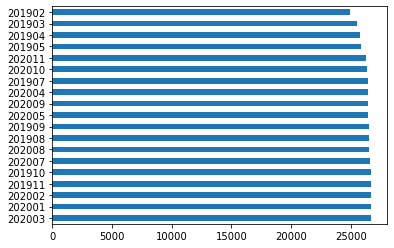

In [5]:
print("Valores unicos")
print(dataset["periodo"].value_counts(dropna=False))
dataset["periodo"].value_counts().plot.barh()

dataset["periodo"] = dataset["periodo"].astype(str)

X = pd.get_dummies(dataset["periodo"])


#### id_cli

Numero de identificación del cliente, basicamente esta es una variable para hacer seguimiento, no aporta información al modelo



In [6]:
print("Valores unicos")
print(dataset["id_cli"].value_counts(dropna=False))
print("Vemos si están completos")
print(dataset["id_cli"].value_counts().sum())

dataset["id_cli"] = dataset["id_cli"].astype(str)

# X = pd.concat([X, pd.get_dummies(dataset["id_cli"])], axis=1)


Valores unicos
3248078    19
2326573    19
2187888    19
1137271    19
600697     19
           ..
5966939     8
300187      8
178971      7
3884969     5
1382911     2
Name: id_cli, Length: 26838, dtype: int64
Vemos si están completos
500000


#### Fecha de Nacimiento

Podría ser interesante hacer una nueva varible que agrupe a lso clientes por mes de nacimiento, investigar que tan buena idea puede ser. Ademas se ve que existe un dato muy extraño y es la fecha 19000101 , dado que indicaría una persona que nacío el primero de Enero de 1900, además son muchos datos

Valores unicos
19800920    204
20000101    180
19770111    171
19900728    168
19811215    168
           ... 
11941215      2
19910208      2
20190715      1
19610323      1
20200221      1
Name: fecha_nacimiento, Length: 13672, dtype: int64


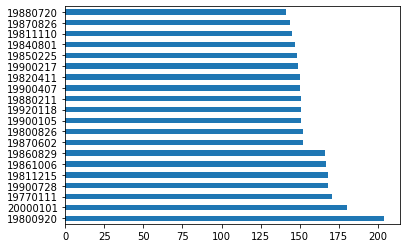

In [7]:
print("Valores unicos")
print(dataset["fecha_nacimiento"].value_counts(dropna=False))
dataset["fecha_nacimiento"].value_counts()[:20].plot.barh()

#### Edad

Edad del cliente, en esta columna se tiene un problema y es que el tipo de datos está mezclado porque se define como cadena de texto, lo primero que se hará sera ver la distribución de los datos 

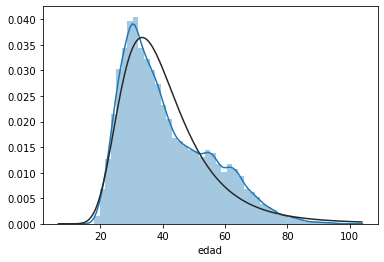

In [60]:
# print("Parametros = {}".format(sp.stats.alpha.fit(dataset['edad'])))
sns.distplot(dataset['edad'], fit=sp.stats.alpha, kde=True)


Datos NaN = 130
Valores unicos
41.661234    130
30.502396     69
30.198494     65
30.595483     63
30.951403     63
            ... 
55.991786      1
59.874059      1
65.749487      1
23.556468      1
56.607803      1
Name: edad, Length: 47052, dtype: int64


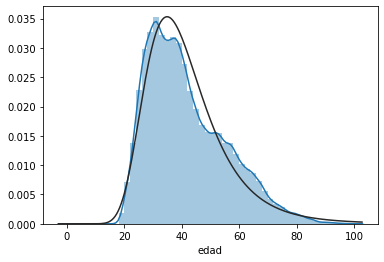

In [8]:
# Se transforman todos los datos como cadenas a datos de
# punto flotante
dataset["edad"] = dataset["edad"].astype(float)

# se encuentran los índices en la base de datos que cumplen
# la condicion de nan necesario para rellenar los indices
index = dataset["edad"].index[dataset["edad"].apply(np.isnan)]
print("Datos NaN = {}".format(len(index)))

# por hacer una prueba se rellena los datos faltantes eligiendo datos
# de la columna edad como el promedio
dataset["edad"] = dataset["edad"].fillna(dataset["edad"].mean())


# asi se compara el tipo de datos (útil) 
# np.isnan(dataset["edad"][26571])

print("Valores unicos")
print(dataset["edad"].value_counts(dropna=False))
# print("Tipos de datos en las columnas = {}".format(dataset.edad.dtype))
# print("Parametros = {}".format(sp.stats.alpha.fit(dataset['edad'])))
sns.distplot(dataset['edad'], fit=sp.stats.alpha, kde=True)

X = pd.concat([X, dataset["edad"]], axis=1)


#### Genero

Esta ase de datos está completa, lo que se debe hacer ahora es cambiar en la base de datos las cadenas por numero para economizar memoria

Valores unicos
M    252686
F    247314
Name: genero, dtype: int64


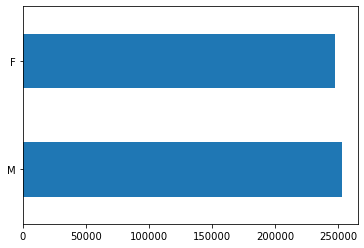

In [9]:
# dataset["genero"][dataset["genero"] == "M"] = 1
# dataset["genero"][dataset["genero"] == "F"] = 0

print("Valores unicos")
print(dataset["genero"].value_counts(dropna=False))

dataset["genero"].value_counts().plot.barh()


X = pd.concat([X, pd.get_dummies(dataset["genero"])], axis=1)


#### Estado civil

Como se tiene una variable categórica y los valores perdidos se propone adherir a la varibale "OTRO"los valores en blanco 

In [10]:
# se encuentran los indices para identificar los valores 
# en blanco y reemplazarlos por "OTROS"
dataset["estado_civil"][dataset["estado_civil"].isnull()] = "OTRO"

SOLTERO        225143
CASADO         140338
UNION LIBRE     56967
NO INFORMA      43483
DIVORCIADO      19593
VIUDO            9103
OTRO             5373
Name: estado_civil, dtype: int64


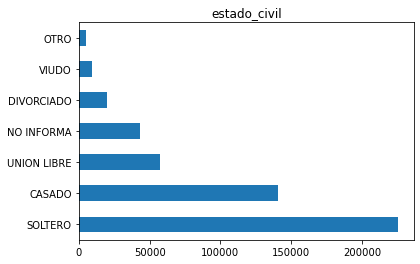

In [12]:
print(dataset["estado_civil"].value_counts(dropna=False))
dataset["estado_civil"].value_counts().plot.barh()
plt.title("estado_civil")

X = pd.concat([X, pd.get_dummies(dataset["estado_civil"])], axis=1)


#### Nivel académico

Se hace una revisión para ver como están distribuidos las bases de datos

UNIVERSITARIO      185338
NO INFORMA          77345
SIN INFORMACION     67150
TECNOLOGO           64031
BACHILLER           55715
ESPECIALIZACION     39496
PRIMARIO             6594
NINGUNO              4331
Name: nivel_academico, dtype: int64


Text(0.5, 1.0, 'nivel_academico')

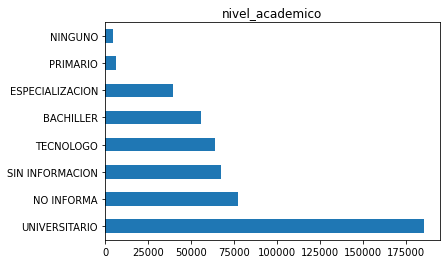

In [13]:
print(dataset["nivel_academico"].value_counts(dropna=False))
dataset["nivel_academico"].value_counts().plot.barh()
plt.title("nivel_academico")


Al parecer existen variables duplicadas que se pueden indexar en una sola, por ejemplo "SIN INFORMACION" y "NO INFORMA"podríamos considerarlas como equivalentes, en este caso hacemos la unión 

In [14]:
dataset["nivel_academico"][dataset["nivel_academico"] == "NO INFORMA"] = "SIN INFORMACION"

Se hace de nuevo la revisión de las variables para ver como quedo la nueva distribución 

UNIVERSITARIO      185338
SIN INFORMACION    144495
TECNOLOGO           64031
BACHILLER           55715
ESPECIALIZACION     39496
PRIMARIO             6594
NINGUNO              4331
Name: nivel_academico, dtype: int64


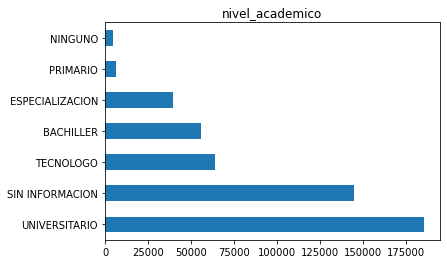

In [15]:
print(dataset["nivel_academico"].value_counts(dropna=False))
dataset["nivel_academico"].value_counts().plot.barh()
plt.title("nivel_academico")

X = pd.concat([X, pd.get_dummies(dataset["nivel_academico"])], axis=1)


#### Profesión

Se evidencia en primer lugar las variables y como está distribuida la variable profesión 

NaN                                             29110
OTROS                                           27707
ADMINISTRACION                                   7861
CONTADURIA                                       3339
NINGUNA                                          2810
                                                ...  
INGENIERIA DE MINAS                                19
INGENIERIA FORESTAL                                19
RELIGIOSA                                          15
FILOSOFOS, TRADUCTORES E INTERPRETES                3
SOCIOLOGO, ANTROPOLOGOS Y ESPECIALISTA SIMIL        2
Name: profesion, Length: 79, dtype: int64


Text(0.5, 1.0, 'profesion')

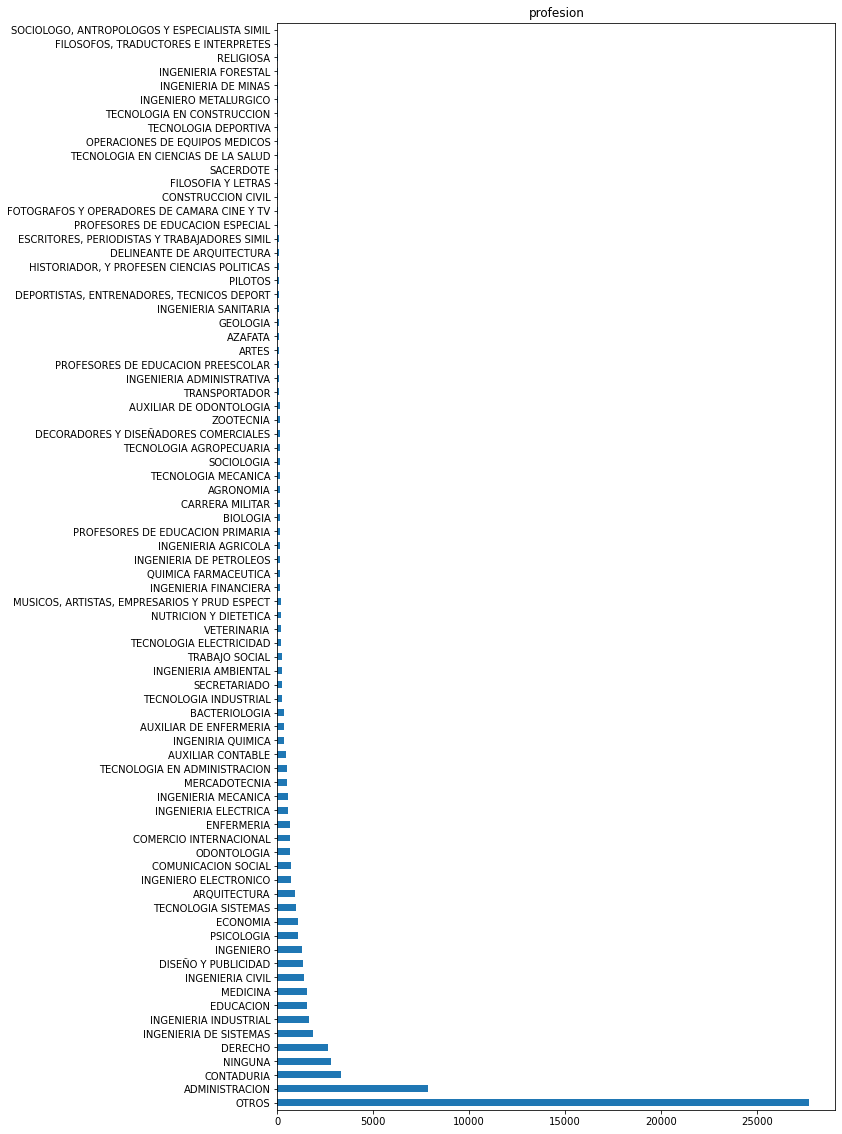

In [16]:
fig = plt.figure(figsize=(10,20))
print(dataset["profesion"].value_counts(dropna=False))
dataset["profesion"].value_counts().plot.barh()
plt.title("profesion")


Acá aparece un problema considerable, porque no se tiene mucha información , por tanto como primera medida se incorpora los datos faltantes a la variable "OTROS". Se debe revisar esta variable, es una salida transitoria para levantar un primer modelo 

OTROS                                           56817
ADMINISTRACION                                   7861
CONTADURIA                                       3339
NINGUNA                                          2810
DERECHO                                          2634
                                                ...  
INGENIERIA DE MINAS                                19
INGENIERIA FORESTAL                                19
RELIGIOSA                                          15
FILOSOFOS, TRADUCTORES E INTERPRETES                3
SOCIOLOGO, ANTROPOLOGOS Y ESPECIALISTA SIMIL        2
Name: profesion, Length: 78, dtype: int64


Text(0.5, 1.0, 'profesion')

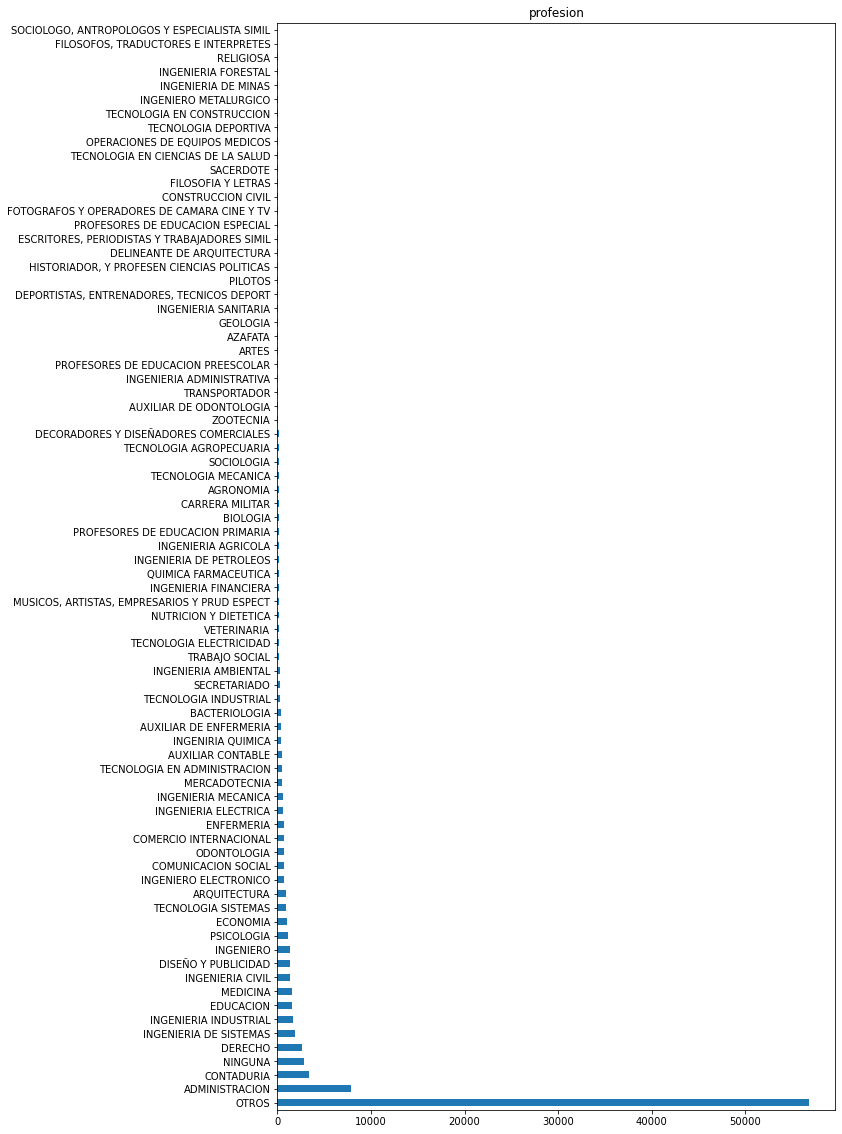

In [17]:
dataset["profesion"][dataset["profesion"].isnull()] = "OTROS"
fig = plt.figure(figsize=(10,20))
print(dataset["profesion"].value_counts(dropna=False))
dataset["profesion"].value_counts().plot.barh()
plt.title("profesion")


#### Ocupación

Revisión de la variable

Empleado                     61095
Independiente                11035
Estudiante                    6889
Jubilado                      5121
Profesional Independiente     4909
Socio Empleado - Socio        2420
Comerciante                   2362
Ama de Casa                   1966
Rentista de Capital           1207
Pensionado                     998
Otro                           885
Desempleado sin Ingresos       362
Desempleado con Ingresos       278
Ganadero                       218
Sin Ocupacion Asignada         138
Agricultor                      96
NaN                             21
Name: ocupacion, dtype: int64


Text(0.5, 1.0, 'ocupacion')

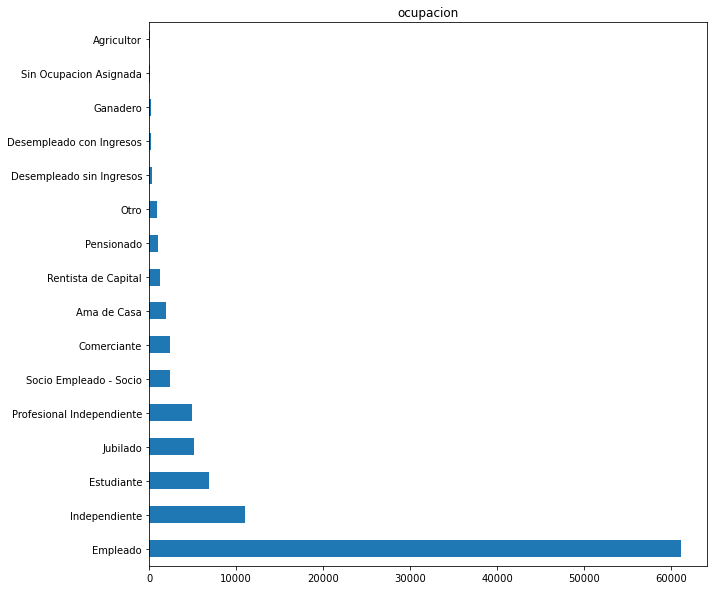

In [18]:
fig = plt.figure(figsize=(10,10))
print(dataset["ocupacion"].value_counts(dropna=False))
dataset["ocupacion"].value_counts().plot.barh()
plt.title("ocupacion")


Se evidencian dos variables con valores extraños, "Vacío" y "NaN". Se considera no significativo su aporte, en este orden de ideas se agregan a la variable otros

In [19]:
# NaM ----> Otro
dataset["ocupacion"][dataset["ocupacion"].isnull()] = "Otro"
# Vacío --> Otro
dataset["ocupacion"][dataset["ocupacion"] == "Vacío"] = "Otro"

Se visualiza de nuevo la distribución 

Empleado                     61095
Independiente                11035
Estudiante                    6889
Jubilado                      5121
Profesional Independiente     4909
Socio Empleado - Socio        2420
Comerciante                   2362
Ama de Casa                   1966
Rentista de Capital           1207
Pensionado                     998
Otro                           906
Desempleado sin Ingresos       362
Desempleado con Ingresos       278
Ganadero                       218
Sin Ocupacion Asignada         138
Agricultor                      96
Name: ocupacion, dtype: int64


Text(0.5, 1.0, 'ocupacion')

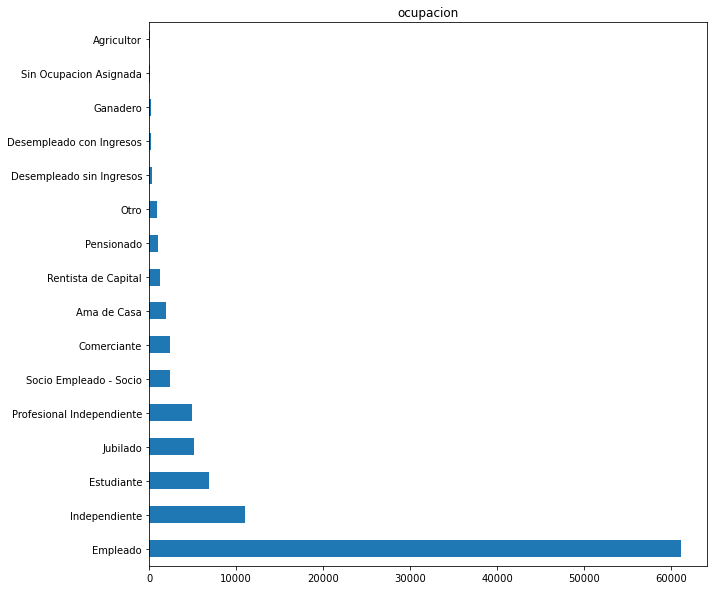

In [20]:
fig = plt.figure(figsize=(10,10))
print(dataset["ocupacion"].value_counts(dropna=False))
dataset["ocupacion"].value_counts().plot.barh()
plt.title("ocupacion")


#### Tipo de Vivienda

Tipo de vivienda reportada por el cliente, se hace una revisión de que categorias constituyen esta variable

NaN           54088
FAMILIAR      19810
PROPIA        15977
ALQUILADA      6531
NO INFORMA     3594
Name: tipo_vivienda, dtype: int64


Text(0.5, 1.0, 'tipo_vivienda')

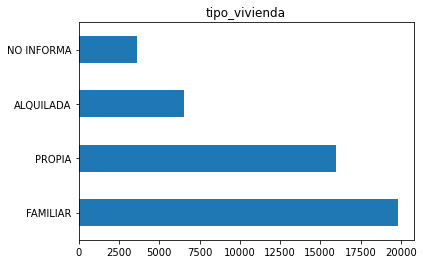

In [21]:
# fig = plt.figure(figsize=(10,10))
print(dataset["tipo_vivienda"].value_counts(dropna=False))
dataset["tipo_vivienda"].value_counts().plot.barh()
plt.title("tipo_vivienda")


Esta es una variable problema porque no se tiene gran información, el mayor datos que se tiene son nulos. Por ahora como primera aproximación se redirecciona todos los valores "NaN" a "NO INFORMA" **Revisar métodos de ingeniería de parámetros**

In [22]:
dataset["tipo_vivienda"][dataset["tipo_vivienda"].isnull()] = "NO INFORMA"


NO INFORMA    57682
FAMILIAR      19810
PROPIA        15977
ALQUILADA      6531
Name: tipo_vivienda, dtype: int64


Text(0.5, 1.0, 'tipo_vivienda')

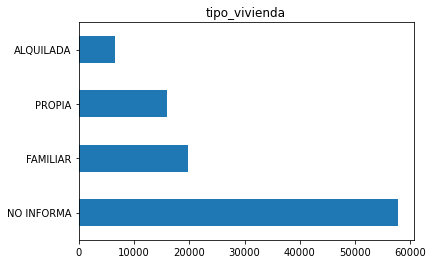

In [23]:
# fig = plt.figure(figsize=(10,10))
print(dataset["tipo_vivienda"].value_counts(dropna=False))
dataset["tipo_vivienda"].value_counts().plot.barh()
plt.title("tipo_vivienda")


#### Fecha última fecha atualizacion

Fecha en la cual se hizo la última actualización de los datos 

20191012    1076
20191013     933
20180526     705
20180525     698
20170520     599
            ... 
20191111       1
20191201       1
20190119       1
20180122       1
20181209       1
Name: ult_actual, Length: 1071, dtype: int64


Text(0.5, 1.0, 'ult_actual')

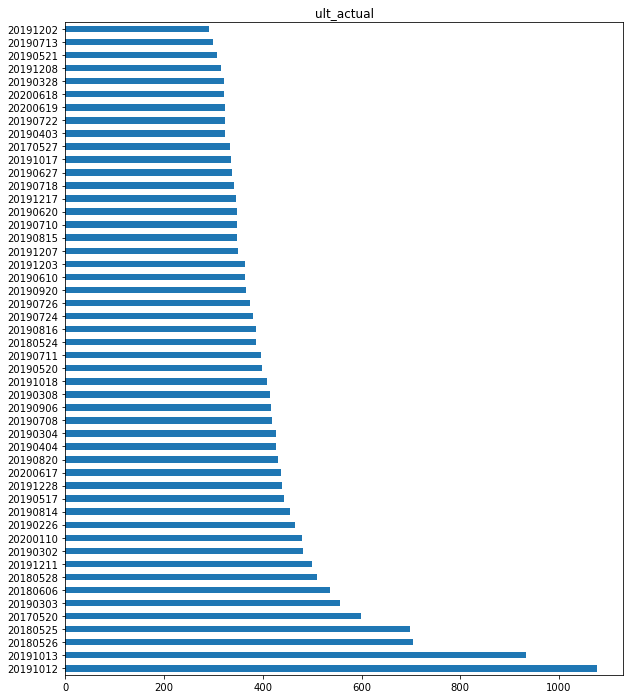

In [24]:
fig = plt.figure(figsize=(10,12))
print(dataset["ult_actual"].value_counts(dropna=False))
dataset["ult_actual"].value_counts()[:50].plot.barh()
plt.title("ult_actual")


No existen datos perdidos en esta variable

#### Categoria

Categorización de los clientes según sus ingresos 

1      57682
2      22714
4      11341
3       5457
NaN     1022
1        900
2        496
4        216
5         88
3         84
Name: categoria, dtype: int64


Text(0.5, 1.0, 'categoria')

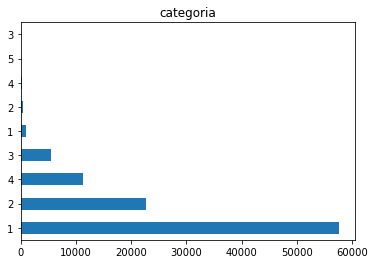

In [25]:
print(dataset["categoria"].value_counts(dropna=False))
dataset["categoria"].value_counts().plot.barh()
plt.title("categoria")


Si esta variable obedece a la descripción hecha en el diccionario de la base de datos , la mayoria de los datos están mezclados, por lo que se puede percibir existen 5 categorias, lo demás es error en la variable. Como propuesta se almacena todo en 6 variables. Las cinco categorias que se ven y otra que agrupe los errores como sexta categoria.

Otra cosa importante es dejar todo en tipo int64 es mas económico en memoria. Se ve que están duplicados por que unos datos están como string y otros int.

Tambien enviar los nan al grupo 6.

In [26]:
# convertir cadenas a enteros
dataset["categoria"][dataset["categoria"] == "1"] = 1
dataset["categoria"][dataset["categoria"] == "2"] = 2
dataset["categoria"][dataset["categoria"] == "3"] = 3
dataset["categoria"][dataset["categoria"] == "4"] = 4
dataset["categoria"][dataset["categoria"] == "5"] = 5

# Llevar NaN el grupo 6
dataset["categoria"][dataset["categoria"].isnull()] = 6


# Para eliminar los datos de sobra se puede ver que las
# variables que nos interesan son enteros entonces, todo
# lo que no sea entero se manda al grupo 6
# for i in range(len(dataset.categoria)):
#     if type(dataset.categoria[i]) != int:
#         dataset.categoria[i] = 6

1    58582
2    23210
4    11557
3     5541
6     1022
5       88
Name: categoria, dtype: int64


Text(0.5, 1.0, 'categoria')

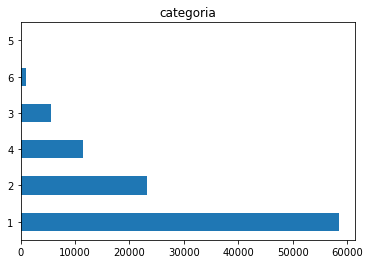

In [27]:
print(dataset["categoria"].value_counts(dropna=False))
dataset["categoria"].value_counts().plot.barh()
plt.title("categoria")


#### codigo_ciiu

Actividad económica según clasificación de la DIAN

10      79174
0        6003
90       2115
9609     1003
4923      725
        ...  
8414        4
81          4
5911        4
8219        3
5530        3
Name: codigo_ciiu, Length: 210, dtype: int64


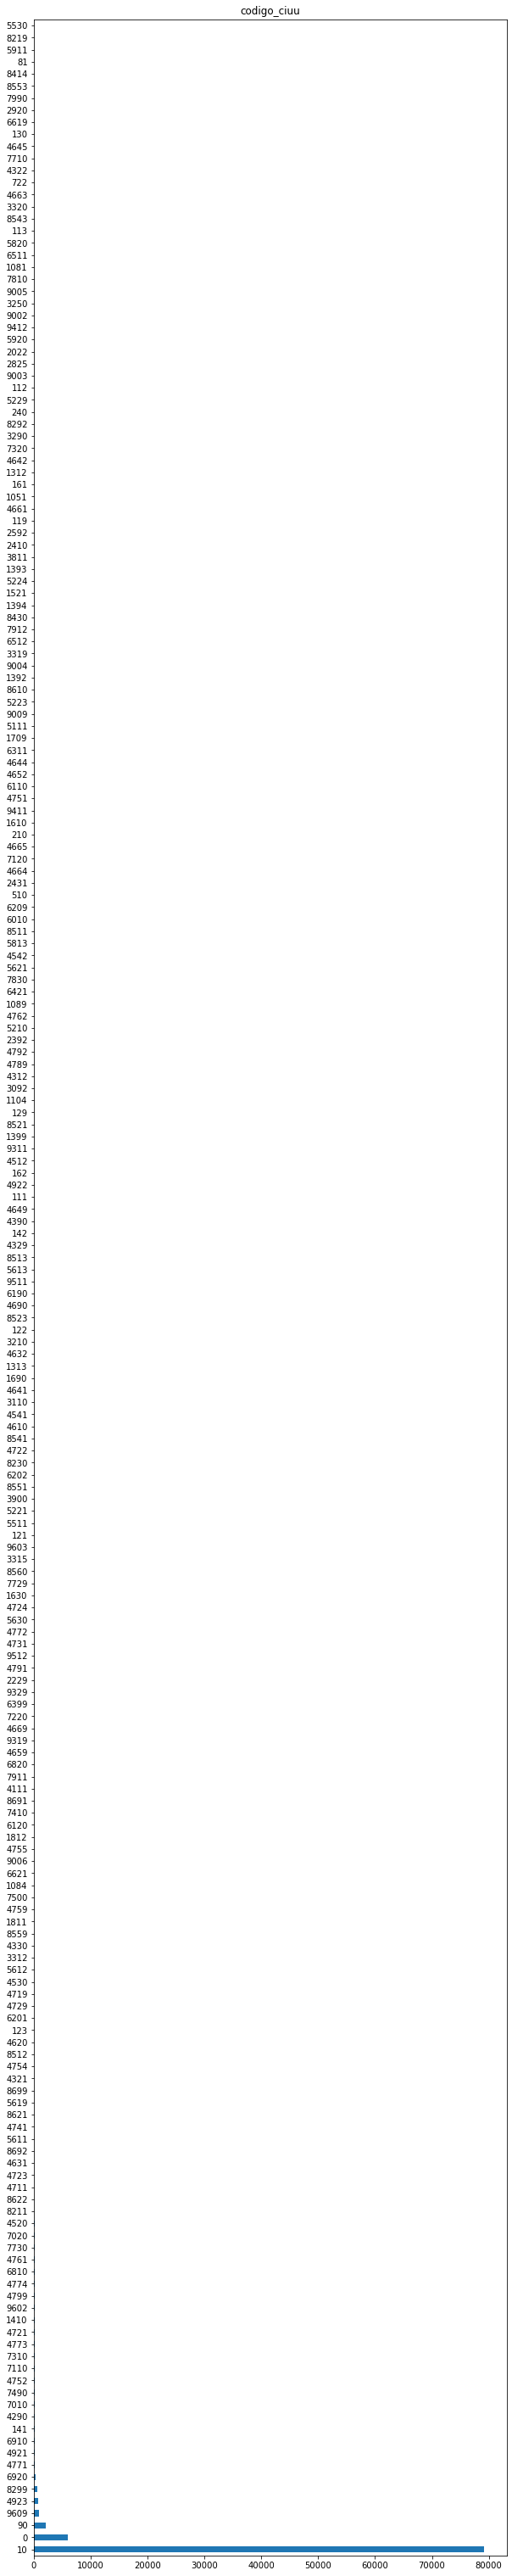

In [28]:
fig = plt.figure(figsize=(10,55))

print(dataset["codigo_ciiu"].value_counts(dropna=False))
dataset["codigo_ciiu"].value_counts().plot.barh()
plt.title("codigo_ciuu")

dataset["codigo_ciiu"] = dataset["codigo_ciiu"].astype(str)


No se encuentran valores perdidos, sin embargo se debe tener en cuenta el desbalance en la base de datos porque puede quedar sesgada la variable


#### Indicador de mora vigente

Indica si el cliente incurre en mora en un producto con el banco

N      97455
S       2495
NaN       50
Name: ind_mora_vigente, dtype: int64


Text(0.5, 1.0, 'ind_mora_vigente')

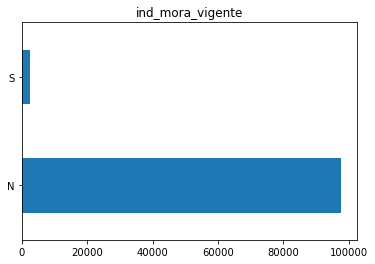

In [29]:
print(dataset["ind_mora_vigente"].value_counts(dropna=False))
dataset["ind_mora_vigente"].value_counts().plot.barh()
plt.title("ind_mora_vigente")


Se rellena los faltantes con la moda de la variable 

In [30]:
dataset['ind_mora_vigente'] = dataset['ind_mora_vigente'].fillna(dataset['ind_mora_vigente'].mode()[0])

N    97505
S     2495
Name: ind_mora_vigente, dtype: int64


Text(0.5, 1.0, 'ind_mora_vigente')

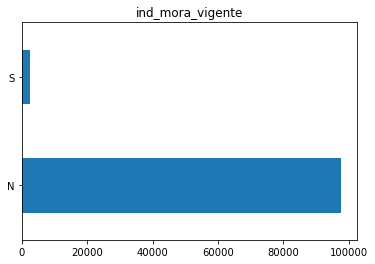

In [31]:
print(dataset["ind_mora_vigente"].value_counts(dropna=False))
dataset["ind_mora_vigente"].value_counts().plot.barh()
plt.title("ind_mora_vigente")


#### Cartera castigada

Indica si el cliente tiene cartera castigada al momento 

N      99741
S        209
NaN       50
Name: cartera_castigada, dtype: int64


Text(0.5, 1.0, 'Cartera castigada')

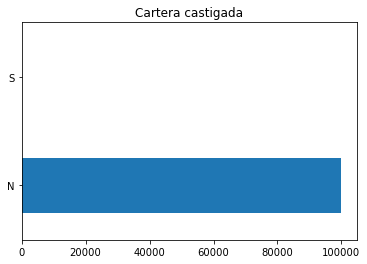

In [32]:
print(dataset["cartera_castigada"].value_counts(dropna=False))
dataset["cartera_castigada"].value_counts().plot.barh()
plt.title("Cartera castigada")


In [33]:
dataset.columns

Index(['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'tipo_vivienda', 'ult_actual', 'categoria', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'tenencia_tc', 'cuota_tc_bancolombia', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen',
       'cat_ingreso', 'ingreso_final', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota

Importante arreglar esta situación para poder tener en cuenta todas las variables

### Ingeniería de Parametros

In [36]:
print("Tamaño de los datos:")
print("Número de dato:      ", dataset.shape[0])
print("Número de variables: ", dataset.shape[1])
print(" ")
print("Valores perdidos")
obj = dataset.isnull().sum()
for key, value in obj.iteritems():
    if value != 0:
#       Columnas con valores perdidos
        missing_col = key
        print("{: >30}    porcentaje faltante = {:.3f}%".format(key, (value/dataset.shape[0])*100))

Tamaño de los datos:
Número de dato:       1000000
Número de variables:  65
 
Valores perdidos
             cartera_castigada    porcentaje faltante = 0.066%
             ciudad_residencia    porcentaje faltante = 0.237%
       departamento_residencia    porcentaje faltante = 0.056%
                ciudad_laboral    porcentaje faltante = 26.176%
          departamento_laboral    porcentaje faltante = 26.896%
               rechazo_credito    porcentaje faltante = 99.444%
                      mora_max    porcentaje faltante = 28.431%
    cant_moras_30_ult_12_meses    porcentaje faltante = 28.431%
    cant_moras_60_ult_12_meses    porcentaje faltante = 28.431%
    cant_moras_90_ult_12_meses    porcentaje faltante = 28.431%
                 tiene_consumo    porcentaje faltante = 87.380%
               tiene_crediagil    porcentaje faltante = 86.078%
               nro_tot_cuentas    porcentaje faltante = 0.001%
                  ctas_activas    porcentaje faltante = 0.001%
            ti

Se identifica que las cuatro variables descritas tieien valores perdidos, se debe hacer ingeniería de parámetros para completar estos datos. Se proponen técnicas para completar estos vacíos en la base de datos

+ Imputación arbitraria:
    * Se considera el promedio de las variables si es una variable numerica o la moda si es una variable categórica
+ Imputación de acuerdo a la moda
    * Se considera el promedio de las variables si es una variable numerica o la moda si es una variable categórica
+ Imputación por k-means(Técnica de agrupamiento):
    * Intenta encontrar centroides con distancias mínimas entre puntos para hacer grupos.
+ 


### Variable Objetivo

Es importante estudiar la distribución de la variable respuesta, es la variable de interés. En primer lugar se descartan los valores atípicos de la variable gasto familiar


In [16]:
dataset["gasto_familiar"] = dataset["gasto_familiar"].astype(float)

Text(0.5, 1.0, 'Gasto familiar')

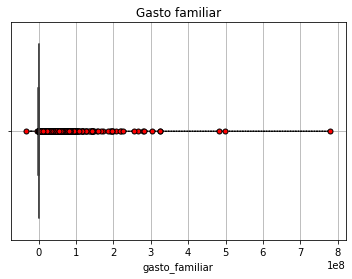

In [38]:
plt.figure()
flp = dict(marker="o",
           markerfacecolor="red",
           markersize=5,
           linestyle="--",
           markeredgecolor="black")
sns.boxplot(x=pd.to_numeric(dataset["gasto_familiar"]),
            flierprops=flp,)
plt.grid(True)
plt.title("Gasto familiar")

¿Valores negativos en el gasto familiar?

In [39]:
dataset["gasto_familiar"][dataset["gasto_familiar"] < 0]

128226    -2854940.95
128234   -33821290.00
370943     -161287.14
608579    -2313810.69
865698     -287340.55
Name: gasto_familiar, dtype: float64

¿Valores tan grandes son útiles en el modelo?

In [40]:
dataset["gasto_familiar"][dataset["gasto_familiar"] > 4.5e8]

165232    7.801712e+08
185584    4.821834e+08
923855    4.972727e+08
Name: gasto_familiar, dtype: float64

¿Cual es el promedio?, ¿Salario Mínimo?.

In [41]:
print(np.mean(dataset["gasto_familiar"]),"+-",np.std(dataset["gasto_familiar"]))


864527.9716488675 +- 2411756.090654033


In [17]:
dataset["gasto_familiar"][dataset["gasto_familiar"] < 0] = 0

In [ ]:
sns.distplot(dataset['gasto_familiar'], fit=sp.stats.lognorm, kde=True)
# shape, loc, scale = sp.stats.lognorm.fit(dataset['gasto_familiar'])
# print("Promedio = {:.2f}".format(scale))
# print("Desv est = {:.2f}".format(shape))
# print("Loc      = {:.2f}".format(loc))



Se sugiere que la variable objetivo sigue la estadística de la distribución normal logarítmica, la idea central es consirerar que el logaritmo de la variable está distribuido normalemnete entonces el valor esperado sigue una distribución log-normal.

Una variable puede ser modelada como log-normal si puede ser considerada como un producto multiplicativo de muchos pequeños factores independientes.

Una variable aleatoria $X$ sigue una distribución con parámetros $\mu$ y $\sigma$ si su función de probabilidad es

$$f(x) = \frac{1}{\sigma x \sqrt{2\pi}}e^{-\frac{\ln(x-\mu)^{2}}{2\sigma^{2}}}$$

Para $x>0$ donde $\mu$ y $\sigma$ son la media y la desviación estándar del logaritmo de la variable.

Los modelos responden mejor si uno puede identificar la forma en que se distribuye la variable objetivo. Como ejemplo, para los modelos de regresión lineal es indispensable que la distribución de los datos sea normal. Para el caso de otras distribuciones se debe acudir a modelos lineales generalizados, en este caso se podría pensar que es una distribución que perteneca a la familia exponencial.


### Variables numéricas

Seleccionemos el tipo de variables que son numéricas para hacer un análisis de correlación 

In [44]:
dataset.select_dtypes(include=["float64", "int64"])

,fecha_nacimiento,edad,ult_actual,cupo_total_tc,cuota_tc_bancolombia,mediana_nom3,mediana_pen3,ingreso_nompen,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,gasto_familiar
0,19840630,35.058179,20180526,0.0,0.000000e+00,1255032.0,0.0,1255032.0,0.0,275000.0,0,0,0,0,0,0.0,0,903000,0,232526.0
1,19840630,35.143053,20180526,0.0,0.000000e+00,1255032.0,0.0,1255032.0,0.0,275000.0,0,0,0,0,0,0.0,0,903000,0,265900.0
2,19840630,34.962355,20180526,0.0,0.000000e+00,1255032.0,0.0,1255032.0,0.0,275000.0,0,0,0,0,0,0.0,0,903000,0,243052.0
3,19840630,34.639288,20180526,0.0,0.000000e+00,1282673.0,0.0,1282673.0,0.0,275000.0,0,0,0,0,0,0.0,0,2433000,0,276014.0
4,19840630,35.307324,20180526,0.0,0.000000e+00,1255032.0,0.0,1255032.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,418866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,19780712,40.670773,20180806,16150000.0,2.470648e+06,0.0,0.0,0.0,0.0,0.0,0,3946000,0,0,58250000,32470000.0,4594000,0,0,7244658.0
999996,19780712,42.198494,20200528,16150000.0,1.316297e+06,0.0,0.0,0.0,0.0,1242000.0,816000,2836000,0,0,81678000,6145500.0,974000,38278000,0,1566844.0
999997,19780712,41.204654,20190812,16150000.0,1.200032e+06,0.0,0.0,0.0,0.0,1051000.0,725000,4263000,0,0,81678000,23120000.0,8117000,43798000,0,12575607.0
999998,19780712,41.111567,20190812,16150000.0,1.296709e+06,0.0,0.0,0.0,0.0,1170000.0,0,3378000,0,0,59448000,20840500.0,2579000,32500000,0,1212687.0


Para iniciar se hace una matriz de correlación, algunos modelos de regresión se ven perjudicados al incluir predictores alatamente correlacionados. Por esta razón es conveniente prestar atención a la correlación de las variasbles numéricas

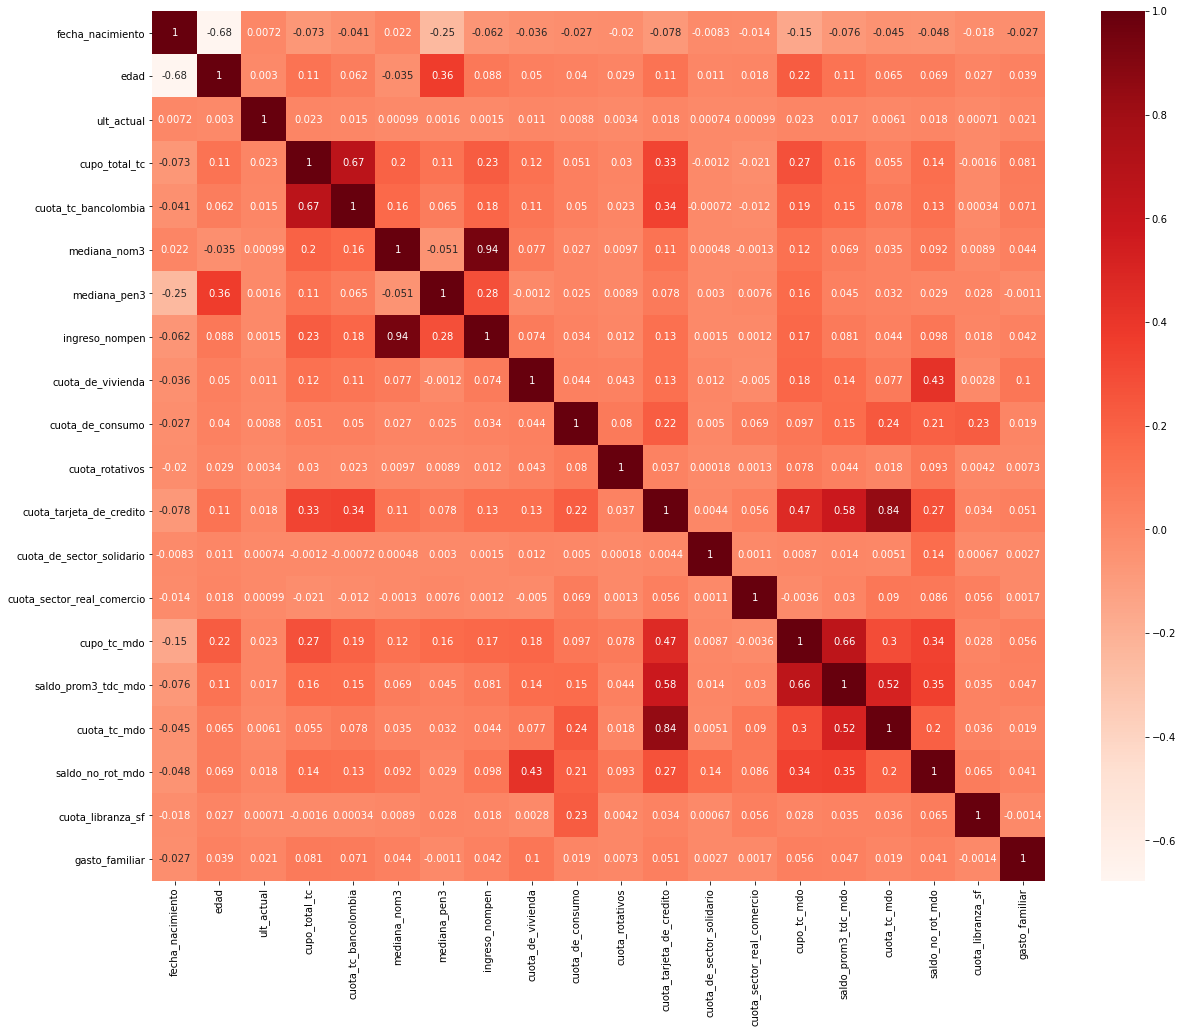

In [45]:
plt.figure(figsize=(20,16))
corr_matrix = dataset.select_dtypes(include=['float64', 'int']).corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)


En relación con la variable objetivo, ninguna presenta una correlación fuerte, pero si se observa fuertes correlaciones entre las variables de entrada

In [46]:
cor_t = abs(corr_matrix["gasto_familiar"])
features_choose = cor_t[cor_t >0.5]
features_choose

gasto_familiar    1.0
Name: gasto_familiar, dtype: float64

In [47]:
cor_t = abs(corr_matrix["cupo_tc_mdo"])
features_choose = cor_t[cor_t >0.5]
features_choose

cupo_tc_mdo            1.000000
saldo_prom3_tdc_mdo    0.659111
Name: cupo_tc_mdo, dtype: float64

### Variables cualitativas

Dado que el conjunto de datos está con errores de tipología de datos, se hace el análisis pertinente para ubicar que variables numéricas están como continuas.

Algo para tener en cuenta es que si alguno de los niveles de una variable cualitativa tiene pocas observaciones en comparación a otros niveles, puede ocurrir que durante la validación cruzada algunas particiones queden fuertemente desbalanceadas, lo que suele dar lugar a errores severos en el modelo. algunas ideas:

+ Eliminar las observaciones del grupo minoritario si tennemos una gran cantidad de clases

+ Agrupar las variables minoritarias en una sola clase

+ Asegurar de alguna manera que al hacer particiones aleatorias en los datos , estas particiones respeten la proporcion de aporte de la gamma de variables 

In [48]:
dataset.select_dtypes(include=["object"]).describe()

,periodo,id_cli,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,categoria,codigo_ciiu,...,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,...,844635,844635,838967,838967,999671,1000000,853935,147549,263187,279890
unique,19,53678,3,7,7,87,16,4,6,410,...,9,30,72,80,590359,9,22,3009,164196,30733
top,202003,18338,1,SOLTERO,UNIVERSITARIO,OTROS,Empleado,NO INFORMA,1,10,...,0,0,1,0,351949.3,A,0,70337,1840000,828116
freq,53434,20,505725,450081,367037,569462,613966,519797,576509,785454,...,831973,816083,152136,790649,786,206914,671982,10877,339,36899


### Modelo de prueba



In [18]:
X

,201902,201903,201904,201905,201907,201908,201909,201910,201911,202001,...,SOLTERO,UNION LIBRE,VIUDO,BACHILLER,ESPECIALIZACION,NINGUNO,PRIMARIO,SIN INFORMACION,TECNOLOGO,UNIVERSITARIO
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
499996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
499997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
499998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [19]:
y = dataset["gasto_familiar"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=11,
                                                    shuffle=True)

In [20]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)


0.008931629328208457
[ 2.64864324e+15  2.64864324e+15  2.64864324e+15  2.64864324e+15
  2.64864324e+15  2.64864324e+15  2.64864324e+15  2.64864324e+15
  2.64864324e+15  2.64864324e+15  2.64864324e+15  2.64864324e+15
  2.64864324e+15  2.64864324e+15  2.64864324e+15  2.64864324e+15
  2.64864324e+15  2.64864324e+15  2.64864324e+15  2.05000000e+03
 -5.78949528e+15 -5.78949528e+15 -4.83347611e+15 -4.83347611e+15
 -4.83347611e+15 -4.83347611e+15 -4.83347611e+15 -4.83347611e+15
 -4.83347611e+15 -1.13403639e+16 -1.13403639e+16 -1.13403639e+16
 -1.13403639e+16 -1.13403639e+16 -1.13403639e+16 -1.13403639e+16]


In [50]:
y

0         232526.00
1         265900.00
2         243052.00
3         276014.00
4         418866.00
            ...    
99995     421964.00
99996          0.00
99997     931716.38
99998     311200.00
99999    1109236.08
Name: gasto_familiar, Length: 100000, dtype: float64